In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("./data/train.csv")
data.head()

,Id,url,Predicted
0,0,http://banqsuepoy.temp.swtest.ru/pb/assistance...,1
1,1,https://my.mail.ru/community/mir24.tv/,0
2,2,https://rmailidtrack-b484fa.ingress-bonde.ewp....,1
3,3,http://tjvodxie.cn.b2b168.com/m296765p1/,0
4,4,https://articulate.com/360/review,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185910 entries, 0 to 185909
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Id         185910 non-null  int64 
 1   url        185910 non-null  object
 2   Predicted  185910 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ MB


<Axes: xlabel='Predicted', ylabel='count'>

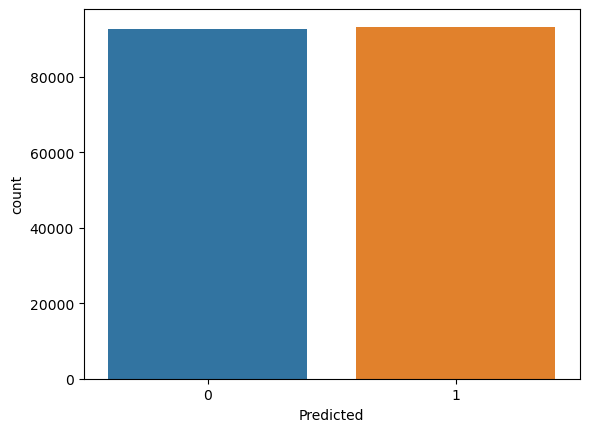

In [4]:
sns.countplot(data, x="Predicted")

In [5]:
data.url.value_counts()

https://ceska-posta-be61a7.ingress-erytho.ewp.live/verifici/manage/                                                     12
https://events-hype-subscribe.club/                                                                                     10
https://ads2list.com/m&t.verified/                                                                                      10
https://idsvssavorg.weebly.com/                                                                                         10
http://siphen.com/afi/upload                                                                                            10
                                                                                                                        ..
https://www.evga.com/support/faq/afmhome.aspx                                                                            1
http://xiaomivietnam.org/RetailInternetPortal../                                                                         1
https://ruliweb.

In [6]:
data = data.drop_duplicates(subset=["url"])

In [7]:
data.isna().sum()

Id           0
url          0
Predicted    0
dtype: int64

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

models = {
    "rf": {
        "model": Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ("rf", RandomForestClassifier())
        ]),
        "params": {
            "rf__n_estimators": np.arange(10, 100, 10),
            "rf__max_features": ["auto", "sqrt"],
            "rf__max_depth": [3, 5, 7],
            "rf__min_samples_split": [2, 5, 10],
            "rf__min_samples_leaf": [1, 2, 4],
            "rf__bootstrap": [True, False]
        }
    },
    "lr": {
        "model": Pipeline([
            ('vect', CountVectorizer()),
            ("lr", LogisticRegression(max_iter=100000))
        ]),
        "params": {
            "lr__penalty": ["l1", "l2"],
            "lr__C": np.logspace(-4, 4, 20),
            "lr__solver": ["liblinear"]
        }
    },
    "dt": {
        "model": Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ("dt", DecisionTreeClassifier())
        ]),
        "params": {
            "dt__criterion": ["gini", "entropy"],
            "dt__max_depth": [3, 5, 7],
            "dt__min_samples_split": [2, 5, 10],
            "dt__min_samples_leaf": [1, 2, 4],
            "dt__max_features": ["auto", "sqrt"]
        }
    },
    "knn": {
        "model": Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ("knn", KNeighborsClassifier())
        ]),
        "params": {
            "knn__n_neighbors": np.arange(1, 20, 2),
            "knn__weights": ["uniform", "distance"],
            "knn__algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
            "knn__p": [1, 2]
        }
    },
    "svm": {
        "model": Pipeline([
            ('vect', CountVectorizer()),
            ('tfidf', TfidfTransformer()),
            ("svm", SVC())
        ]),
        "params": {
            "svm__C": [0.1, 1, 10, 100],
            "svm__gamma": [1, 0.1, 0.01, 0.001],
            "svm__kernel": ["rbf"]
        }
    }
}

# Take sample of 10000 urls
data_sample = data[:10000]

x = data_sample["url"]
y = data_sample["Predicted"]

Training rf...


/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it 

Training lr...
Training dt...


/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'`.
  warnings.warn(
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/tree/_classes.py:269: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_fea

Training knn...


/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use tree with sparse input: using brute force
  warnings.warn("cannot use tree with sparse input: using brute force")
/home/gregor/miniconda3/lib/python3.10/site-packages/sklearn/neighbors/_base.py:557: UserWarning: cannot use

Training svm...


<Axes: xlabel='model_name', ylabel='best_score'>

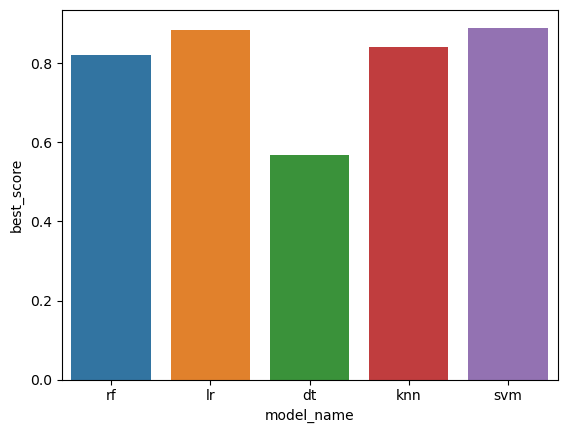

In [9]:
scores = []

for model_name, model in models.items():
    print(f"Training {model_name}...")
    clf = RandomizedSearchCV(model["model"], model["params"], n_iter=10, cv=4, random_state=42, n_jobs=-1)
    clf.fit(x, y)
    scores.append({
        "model_name": model_name,
        "model": clf.best_estimator_,
        "best_score": clf.best_score_,
        "best_params": clf.best_params_
    })


sns.barplot(pd.DataFrame(scores, columns=["model_name", "model", "best_score", "best_params"]), x="model_name", y="best_score")

In [10]:
test_data = pd.read_csv("./data/test.csv")

In [11]:
best_model_index = np.argmax([score["best_score"] for score in scores])
best_model = scores[best_model_index]['model']

In [12]:
data2 = pd.read_csv('./data/phishing_site_urls.csv', header='infer')

data2.rename(columns={"URL": "url", "Label": "Predicted"}, inplace=True)
data2.replace({"Predicted": {"bad": 1, "good": 0}}, inplace=True)

data2

,url,Predicted
0,nobell.it/70ffb52d079109dca5664cce6f317373782/...,1
1,www.dghjdgf.com/paypal.co.uk/cycgi-bin/webscrc...,1
2,serviciosbys.com/paypal.cgi.bin.get-into.herf....,1
3,mail.printakid.com/www.online.americanexpress....,1
4,thewhiskeydregs.com/wp-content/themes/widescre...,1
...,...,...
549341,23.227.196.215/,1
549342,apple-checker.org/,1
549343,apple-iclods.org/,1
549344,apple-uptoday.org/,1


<Axes: xlabel='Predicted', ylabel='count'>

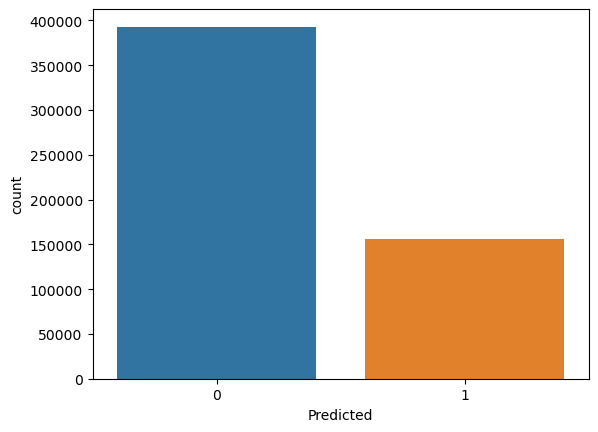

In [13]:
sns.countplot(data2, x="Predicted")

In [14]:
data_merged = pd.concat([data[10001:], data2])
data_merged["url"].value_counts()

jhomitevd2abj3fk.onion.to/                                                                            52
jhomitevd2abj3fk.tor2web.org/                                                                         52
zjfq4lnfbs7pncr5.onion.to/                                                                            44
zjfq4lnfbs7pncr5.tor2web.org/                                                                         44
mphtadhci5mrdlju.tor2web.org/                                                                         42
                                                                                                      ..
library.fes.de/pdf-files/iez/03796/17swaziland.pdf                                                     1
services.bepress.com/cgi/viewcontent.cgi?article=1001&amp;context=itfa                                 1
'search.ohiolink.edu/etd/send-pdf.cgi/Semones\%20Marianne\%20Rutledge.pdf?acc_num=ohiou1126294341'     1
www.bis.gov.uk/files/file14772.pdf                     

In [15]:
data_merged.drop_duplicates(subset=["url"], inplace=True)
data_merged["url"].value_counts()

https://www.emeraldworks.com/                                          1
baseball-reference.com/teams/OAK/1978.shtml                            1
baseball-reference.com/teams/OAK/1980.shtml                            1
baseball-reference.com/teams/OAK/1981.shtml                            1
baseball-reference.com/teams/OAK/1985.shtml                            1
                                                                      ..
www.codeproject.com/KB/recipes/brainnet.aspx                           1
unlser1.unl.csi.cuny.edu/faqs/lisp-faq/part6/faq-doc-3.html            1
ti.arc.nasa.gov/tech/rse/synthesis-projects-applications/autoclass/    1
www.esuli.it/mpboost                                                   1
apple-search.info                                                      1
Name: url, Length: 672772, dtype: int64

In [16]:
len(data_merged), len(data), len(data2)

(672772, 175579, 549346)

In [17]:
data_merged = data_merged
x = data_merged["url"]
y = data_merged["Predicted"]
best_model.fit(x, y)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svm', SVC(C=10, gamma=1))])

In [19]:
test_data["Predicted"] = best_model.predict(test_data["url"])
test_data.drop("url", axis=1, inplace=True)
test_data.to_csv("./data/submission.csv", index=False)

In [20]:
import joblib
joblib.dump("./model.joblib", best_model)

ValueError: Second argument should be a filename or a file-like object, Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('svm', SVC(C=10, gamma=1))]) (type <class 'sklearn.pipeline.Pipeline'>) was given.